# Multiprocessing

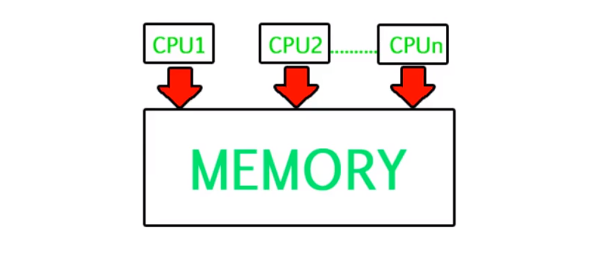

You have multiple processing units, like CPU1, CPU2,...CPU(N). You have a big problem and you split the problem into subproblem and the CPU will run each problem parallely (simultaniously). Which will help you obtain the result in shorter time.


## What ?
Multiprocessing refers to the ability of a system to support more than one processor at the same time. Applications in a multiprocessing system are broken to smaller routines that run independently. The operating system allocates these threads to the processors improving performance of the system.

## Why ?
Consider a computer system with a single processor. If it assigned several processes at the same time, it will have to interrupt each and switch brifly to another, to keep all of the processes going. The situation is just like a chef working in a kitchen alone. He has to do several tasks like baking, stirring, keading dough etc.

The more tasks you must do at once, the more difficult it gets to keep track of them all, and keeping the timing right becomes more of a challenge.

## How ?

**A multiprocessing system can have**
- Multiprocessor, i.e. a computer with more than one central processor.
- Multi-core processor, i.e., a single computer component with two ore more interdependent actual processing units (called cores)

> Here, a CPU can easily executes several tasks at once, with each task using its own processor. It is just like the chef in last situation being assisted by his assistants. Now, they can divide the task among themselves and chef doesn't need to switch between his tasks.

# Multiprocessing in Python

In Python, the multiprocessing module includes a very simple and intutive API for dividing work between multiple processes.

Ref: https://docs.python.org/3/library/multiprocessing.html

In [39]:
def print_cube(number: int) -> None:
    print(f"Cube: {number ** 3}")
    
def print_square(number: int) -> None:
    print(f"Square: {number ** 2}")

In [40]:
print_cube(3)
print_square(3)

Cube: 27
Square: 9


Now, i want a situation where i want to print both cube or square at the same time. And 2 of my processing unit is processing them at the same time.

In [41]:
import multiprocessing

# Helper functions
multiprocessing.cpu_count()

16

We have 16 CPU(s) or 16 processing units, what will happen if we give more that 16 tasks, that would not be ideal.

In [42]:
# To implement multiprocessing, we first have to create process, 
# which is a class in multiprocessing module, which takes a task 
#to execute.

import multiprocessing

# target: funtion to run
# args: params to pass into the function
process_1 = multiprocessing.Process(target=print_cube, args=(5,))
process_2 = multiprocessing.Process(target=print_square, args=(5,))

In [43]:
# we have created our process, but they are not executed yet.
process_1.start() # will start the child process, and the code will
           # be blocked here, it sends the command to the CPU.
    
process_1.join() # will make your program wait, till you p1 is actually
          # complete
    
print("DONE")

Cube: 125
DONE


In [44]:
# Now in order to successfully run them in parallel we have
# to start both the processes at the same time and wait
# for them to complete

process_1 = multiprocessing.Process(target=print_cube, args=(5,))
process_2 = multiprocessing.Process(target=print_square, args=(5,))

#starting them in paralled
process_1.start()
process_2.start()

# waiting for both of them to complete
process_1.join()
process_2.join()
print("DONE")

Cube: 125
Square: 25
DONE


In [45]:
# To check if your process in still alive, means it is still running:
process_1.is_alive() # it is True, when process is in between start and join
process_2.is_alive()

False

Now, Just to make sure, different processes are running different things, let's try to check something more.
We can modify the above code, but let's re-write them.

In [46]:
import os

def print_cube(number: int) -> None:
    print(f"PID::print_cube::id -> {os.getpid()}")
    print(f"Cube: {number ** 3}")
    
def print_square(number: int) -> None:
    print(f"PID::print_square::id -> {os.getpid()}")
    print(f"Square: {number ** 2}")

In [47]:
print(print_cube(2))
print(print_square(2))

PID::print_cube::id -> 308503
Cube: 8
None
PID::print_square::id -> 308503
Square: 4
None


In [48]:
process_1 = multiprocessing.Process(target=print_cube, args=(2,))
process_2 = multiprocessing.Process(target=print_square, args=(2,))

process_1.start()
process_2.start()
process_1.join()
process_2.join()
print("DONE...")

PID::print_cube::id -> 330203
Cube: 8
PID::print_square::id -> 330206
Square: 4
DONE...


### Sharing data between processes

In multiprocessing, any newly created process will do following:
- run independently
- have their own memory space

We want to see, how child and parent process can talk to each other.

In [49]:
import multiprocessing

In [50]:
result = []

In [51]:
def square_list(mylist):
    global result
    
    for num in mylist:
        result.append(num ** 2)
    print(f"Result: {result}")

In [52]:
mylist = [1, 2, 3, 4, 5]

In [53]:
process_1 = multiprocessing.Process(target=square_list, args=(mylist,))
process_1.start()
process_1.join()
print("DONE...")

Result: [1, 4, 9, 16, 25]
DONE...


In [54]:
print(result)

[]


As per my parent process, he result is empty, but the client process has result, which shows that both have different memeory spaces.

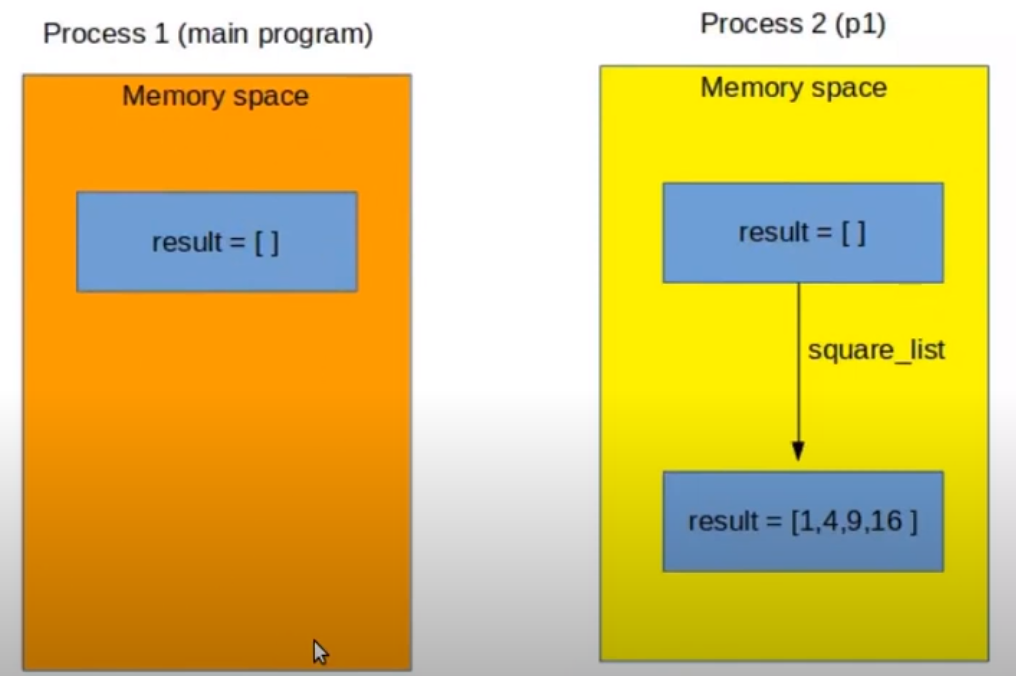

So, as we saw there is an issue with data sharing...
In the above case the data is with the memory space of the process and not the global memeory space, we'll see how we can fix this.

There are different methods to solve this issue:
- Shared Memory

## METHOD 1: Shared Memory

Multiprocessing module provides `Array` and `Value` objects to share data between processes.
- **Array**: a ctype array allocated for shared memory
- **Value**: a ctype object allocated for shared memory

In [2]:
import multiprocessing

In [3]:
def square_list(mylist, result, square_sum):
    for idx, num in enumerate(mylist):
        result[idx] = num ** 2
    
    square_sum.value = sum(result)

In [4]:
my_list = [1, 2, 3, 4]

In [5]:
# creating shared memoery array

result = multiprocessing.Array('i', 4) # i: integer; 4: size (c programming style array)

square_sum = multiprocessing.Value('i') # value object to store integer

process_1 = multiprocessing.Process(target=square_list, args=(my_list, result, square_sum))

process_1.start()
process_1.join()
print("Process completed...")

Process completed...


In [13]:
# We have defined some variables (result, square_sum) 
# in the main process and they are getting changed in the 
# child process.
print(square_sum.value) # to access Value object

# to get the values from multiprocessing array you have to iterate it
print([result[i] for i in range(4)])

30
[1, 4, 9, 16]


This is how your shared memeory look:
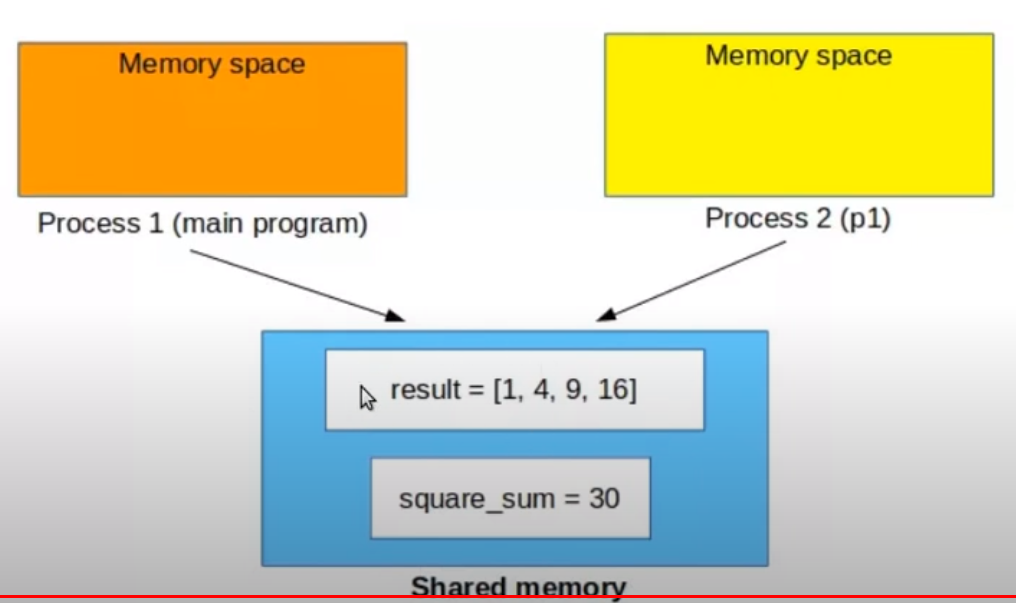

## METHOD 2: Server Process

Whenever a python program starts, a **server process** is also started. From there on, whenever a new process is needed, the parent process connects to the server and requests it to fork a new process. A server process can hold Python objects and allows other processes to manipulate them using proxies.

Multiprocessing module provides a **Manager** class which controls a server process. Hence, managers provide a way to create data which can be shared between different processes

We've seen how we can share data across different processes using shared memeory using multiprocessing. Now we'll see a flexible way of doing the same thing, before that refer the example below

In [14]:
import multiprocessing

def print_record(records):
    for record in records:
        print(f"Name: {record[0]}\nScore: {record[1]}\n")
        
def insert_record(record, records):
    records.append(record)
    print("New record added!")
    
records = [("sam", 10), ("adam", 9), ("kevin", 8)]
new_record = [("jeff", 7)]

p1 = multiprocessing.Process(target=insert_record, args=(new_record, records))
p2 = multiprocessing.Process(target=print_record, args=(records,))

p1.start()
p1.join()

p2.start()
p2.join()

New record added!
Name: sam
Score: 10

Name: adam
Score: 9

Name: kevin
Score: 8



As we can see above, we've created two processes and we triggered them linearly but still the newly added record is not printed in the execution of p2.
- Because the `records` list is local to my parent process and all the child process have their own image of records list and according to p2 the changes reflected by p1 are not reflected back.
- So, in summary there are two child processes and they are not able to coordinate with each other, they are working on different copies of the same data.

In the case of shared memeory we were having arrays and values, two types of objects used by the shared memeroy and used by all the parent and child processes. But, this method is not very flexible you are not able to use your local python objects or data structures like list, tuple, dict etc. 

To do that there is a better method using "Server Process"